# Compare DSM data with independent measuremens
This script compares DSM data obtained from drone flights on a shallow coral reef with independent measurements collected in the field. An example of how the input file should be formatted is provided in the "input" folder, and should contain the following fields:

- Site_Name: name of the site.
- Measured_height: measured height of a coral head above the seabottom in centimeters. 
- DEM_Height: height of a coral head above the seabottom as calculated on a DEM or DSM in centimeters.
- DEM_Height_refraction: height of a coral head above the seabottom as calculated on a DEM or DSM that was corrected by refraction in centimeters.
- GCP_Name: name of the closest Ground Control Point
- Measured_depth: depth of the closest Ground Control Point in meters
- distance: distance from the closest ground control point in meters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np

## Import data
Data is imported and calculated fields are added.

In [2]:
#Imports the IM/GCP comparison file
IM_GCP=pd.read_csv('Input\\IM_GCP.csv')

#Calculating difference between measured and DEM-derived coral height
IM_GCP['meas_dem_diff']=np.abs(IM_GCP['Measured_height']-IM_GCP['DEM_Height_refraction'])
IM_GCP['meas_dem_diff_no_refr']=np.abs(IM_GCP['Measured_height']-IM_GCP['DEM_Height'])

IM_GCP

,Site_Name,Measured_height,DEM_Height,DEM_Height_refraction,GCP_Name,Measured_depth,distance,meas_dem_diff,meas_dem_diff_no_refr
0,TinyGiantClam,47,27.4,43,blue_GCP,-0.80,5.245163,4,19.6
1,TinyGiantClam,72,44.1,65,blue_GCP,-0.80,8.019732,7,27.9
2,TinyGiantClam,56,15.8,22,blue_GCP,-0.80,2.080549,34,40.2
3,TinyGiantClam,25,15.3,20,blue_GCP,-0.80,2.323691,5,9.7
4,SuperCoral,92,60.0,80,blue_GCP,-2.07,2.796312,12,32.0
5,SuperCoral,112,71.7,95,blue_GCP,-2.07,1.567519,17,40.3
6,SuperCoral,34,27.4,34,blue_GCP,-2.07,2.884320,0,6.6
7,SuperCoral,85,63.0,85,blue_GCP,-2.07,2.641210,0,22.0
8,SuperCoral,65,54.0,65,blue_GCP,-2.07,0.895093,0,11.0
9,SuperCoral,44,21.7,30,orange_GCP,-0.85,4.834092,14,22.3


## Compare coral height difference to nearest GCP
The graphs explore wether there is a correlation between the difference between Measured coral height and DEM height and the distance from the nearest GCP or its depth.

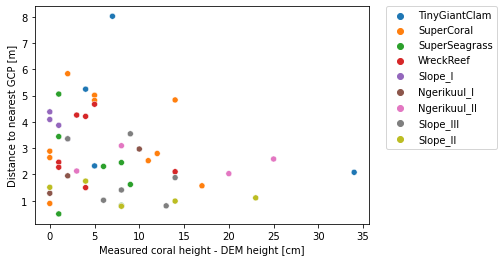

In [12]:
ax=sns.scatterplot(data=IM_GCP, x='meas_dem_diff', y='distance',hue='Site_Name')
plt.xlabel('Measured coral height - DEM height [cm]')
plt.ylabel('Distance to nearest GCP [m]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

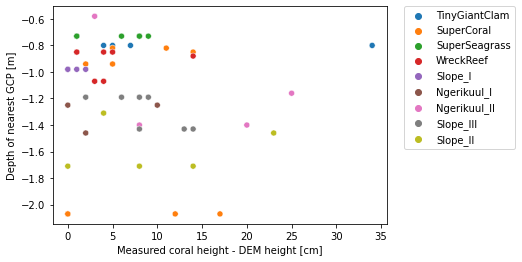

In [4]:
ax=sns.scatterplot(data=IM_GCP, x='meas_dem_diff', y='Measured_depth',hue='Site_Name')
plt.xlabel('Measured coral height - DEM height [cm]')
plt.ylabel('Depth of nearest GCP [m]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Compare measured and DSM-derived coral heights
The graphs explore wether there is a correlation between the coral heights measured in situ and those calculated on the DEM/DSM. The graph compares DSM data with or without refraction correction.

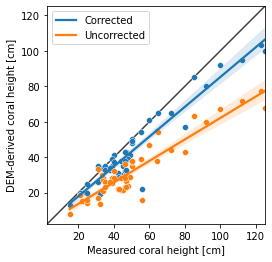

In [14]:
ax=sns.regplot(data=IM_GCP, x='Measured_height', y='DEM_Height_refraction',scatter=False,ci=95,label='Corrected')
ax1=sns.scatterplot(data=IM_GCP, x='Measured_height', y='DEM_Height_refraction')
ax3=sns.regplot(data=IM_GCP, x='Measured_height', y='DEM_Height',scatter=False,ci=95,label='Uncorrected')
ax4=sns.scatterplot(data=IM_GCP, x='Measured_height', y='DEM_Height')

#Thanks https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Measured coral height [cm]')
plt.ylabel('DEM-derived coral height [cm]')
plt.legend()

#Save figure
plt.savefig('Indep_meas_comparison.svg')

In [15]:
rms_height_refr = mean_squared_error(IM_GCP.Measured_height, IM_GCP.DEM_Height_refraction, squared=False)
rms_height_refr

rms_height_no_refr = mean_squared_error(IM_GCP.Measured_height, IM_GCP.DEM_Height, squared=False)
rms_height_no_refr

print('The RMSE of independent measurements with the refraction correction is {:.1f} cm'.format(rms_height_refr))
print('The RMSE of independent measurements without the refraction correction is {:.1f} cm'.format(rms_height_no_refr))


The RMSE of independent measurements with the refraction correction is 10.1 cm
The RMSE of independent measurements without the refraction correction is 21.4 cm


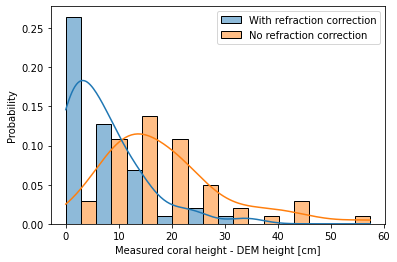

In [16]:
refr=pd.DataFrame()
refr['meas_diff']=IM_GCP['meas_dem_diff']
refr['type']='With refraction correction'

norefr=pd.DataFrame()
norefr['meas_diff']=IM_GCP['meas_dem_diff_no_refr']
norefr['type']='No refraction correction'

hist_df=refr.append(norefr)
ax=sns.histplot(data=hist_df, x='meas_diff',stat='probability',hue='type', multiple="dodge",kde=True)
plt.xlabel('Measured coral height - DEM height [cm]')
ax.legend_.set_title(None)